<a href="https://colab.research.google.com/github/tomepm/Reconocimiento-de-Patrones-y-Aprendizaje-de-Maquina/blob/main/Ejercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio N° 1**
### **Presentado por:** *Pablo Tomé*
### **Enunciado:** En https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv y https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
### Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.Hay variables que puedan ser razonablemente consideradas normales?
## Hay variables que tienen un comportamiento sospechoso?


In [2]:
# Importo librerias para trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Cargo los 2 csv en 1 dataset cada uno
camas_covid_bahia_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/camas_covid_bahia.csv') #, index_col='fecha')
casos_covid_bahia_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_covid_bahia.csv') #, index_col='fecha')

# Cargo los datasets en dataframes
camas_covid_bahia_df = pd.DataFrame(camas_covid_bahia_csv)
casos_covid_bahia_df = pd.DataFrame(casos_covid_bahia_csv)

## **Estadisticas de uso de camas por COVID en Bahia Blanca**

In [14]:
camas_covid_bahia_df = camas_covid_bahia_df.sort_values('fecha')
camas_covid_bahia_df

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
87,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


### **Graficos relevantes:**

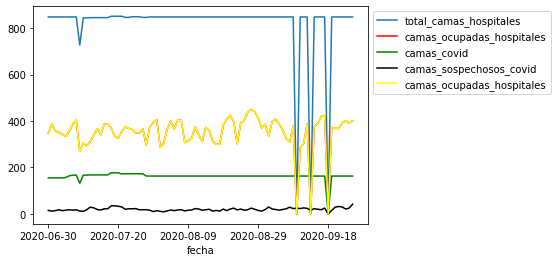

In [16]:
camas_covid_bahia_df_x = plt.gca()

camas_covid_bahia_df.plot(kind='line',x='fecha',y='total_camas_hospitales',ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='camas_ocupadas_hospitales', color='red', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='camas_covid', color='green', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='camas_sospechosos_covid', color='black', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='camas_ocupadas_hospitales', color='yellow', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df_x.legend(bbox_to_anchor=(1.0, 1.0));

plt.show()

### **Comentarios:**

*   Se observa que hay 3 dias donde no hubo registros de uso de camas (9, 13, y 18 de Septiembre del 2020)
*   Se observa que en el periodo observado la cantidad de camas ocupadas con pacientes con covid o sospechosos de covid se maniene constante (salvo los dias no registrados ya mencionados)



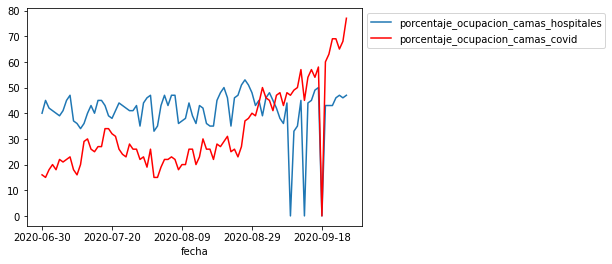

In [18]:
camas_covid_bahia_df_x = plt.gca()

camas_covid_bahia_df.plot(kind='line',x='fecha',y='porcentaje_ocupacion_camas_hospitales',ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='porcentaje_ocupacion_camas_covid', color='red', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df_x.legend(bbox_to_anchor=(1.0, 1.0));

plt.show()

### **Comentarios:**

*   Se observa que hay 3 dias donde no hubo registros de uso de camas (9, 13, y 18 de Septiembre del 2020)
*   Se observa que si bien el porcentaje de uso de camas se mantiene en unos 45%, el porcentaje de ocupacion de camas por covid en el periodo va de unos 15% a casi 80%. Esto quiere decir que se les dió prioridad a los enfermos de covid para ocupar las camas. Este dato no tiene concordancia con los datos del grafico anterior.

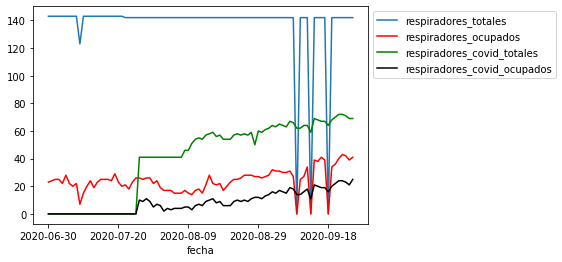

In [19]:
camas_covid_bahia_df_x = plt.gca()

camas_covid_bahia_df.plot(kind='line',x='fecha',y='respiradores_totales',ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='respiradores_ocupados', color='red', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='respiradores_covid_totales', color='green', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df.plot(kind='line',x='fecha',y='respiradores_covid_ocupados', color='black', ax=camas_covid_bahia_df_x, logy=1)
camas_covid_bahia_df_x.legend(bbox_to_anchor=(1.0, 1.0));

plt.show()

### **Comentarios:**

*   Se observa que hay 3 dias donde no hubo registros de uso de respiradores (9, 13, y 18 de Septiembre del 2020).
*   Se observa que se comenzaron a destinar respiradores para enfermos de covid recien el 26/07/2020.
*   Se observa que si bien la cantidad de respiradores ocupados ronda entre 20 y 40, los respiradores destinados a enfermos de covid sube hasta unos 70 y de ellos aproximadamente 20 son por covid.
*   Se observa que la cantidad de respiradores ocupados con enfermos de covid es solo una pequeña parte comparado a los enfermos de covid en el hospital.

## **Estadisticas de casos de COVID en Bahia Blanca**

In [20]:
casos_covid_bahia_df = casos_covid_bahia_df.sort_values('fecha')
casos_covid_bahia_df

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


### **Graficos relevantes:**

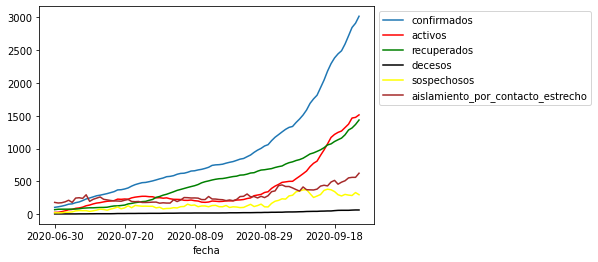

In [22]:
#				descartados	sospechosos	contencion_psicologica	monitoreo_epidemiologico	

casos_covid_bahia_df_x = plt.gca()

casos_covid_bahia_df.plot(kind='line',x='fecha',y='confirmados',ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df.plot(kind='line',x='fecha',y='activos', color='red', ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df.plot(kind='line',x='fecha',y='recuperados', color='green', ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df.plot(kind='line',x='fecha',y='decesos', color='black', ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df.plot(kind='line',x='fecha',y='sospechosos', color='yellow', ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df.plot(kind='line',x='fecha',y='aislamiento_por_contacto_estrecho', color='brown', ax=casos_covid_bahia_df_x, logy=1)
casos_covid_bahia_df_x.legend(bbox_to_anchor=(1.0, 1.0));

plt.show()

### **Comentarios:**

*   Se observa un aumento exponencial de casos confirmados.
*   Se observa que los casos sospechocos solo tiene un pequeño incremento, lo que supone un menor testeo de nuevos casos de covid.
*   Se observa que los casos de aislados por contacto estrechos tambien tiene un pequeño aumento por lo que supone que cada vez se le dió menos importancia a aislar por contacto estrechos.

